In [1]:
import pandas as pd

# URLs of the text files
url1 = 'https://d3c33hcgiwev3.cloudfront.net/2xHE5W9JRlCaHiSsDODncg_b58493b98d284be59834f4a6ab76b8e1_winddata.txt?Expires=1724976000&Signature=SddGm6bYWRWff1n7gUbjM8sUf0Qpy3YVaLPPVgqxb7AgNom3zLm4UoMr~0o6ZUfQS8jwOHO0vl0Miq~BjYfLmaEUrRKHcKeMJzvC~MxeSHmD-3z4hDjfGcEHU0PeuIrUVfyEc5zRve~GXDwHmCpONJK8fWhsTL1ohti3x5diPkc_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'
url2 = 'https://d3c33hcgiwev3.cloudfront.net/8IH7IrfmR5ivOzW-3uCayQ_0752e7dbba93468794130b32860a75e1_Calibration_data.txt?Expires=1724976000&Signature=VKcCQ2nDQMOEa47IbMq7j9tCufRU66BbEh-V2DOwp-iYC8JZ9AnvJY75cNlGmNZaktdPVBtLOWJeC~WzQr7-jXdpuKAZQrqlzi-VRb~jtANJEhfhRHYYqU5igClF0I3qP01QaipdWqf6f3kAY84PtlRRbum1QEcPb~~WskMkbes_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'

# Reading the first text file into a DataFrame
df1 = pd.read_csv(url1, delim_whitespace=True)

# Reading the second text file into a DataFrame
df2 = pd.read_csv(url2, delim_whitespace=True, skiprows=1, names=['F_Hz', 'dP_hPa'])

# Combine both DataFrames horizontally
combined_df = pd.concat([df1, df2], axis=1)

# Constants for the test period
t = 27.2  # temperature in °C
B = 1007.0  # barometric pressure in hPa

# Calculate rho
rho = 1.225 * (288.15 / (t + 273.15)) * (B / 1013.3)

# Calculate V using the formula V = (2 * dP) / rho
combined_df['V'] = (2 * combined_df['dP_hPa']) / rho

# Display the combined DataFrame with the new column
print("\nCombined DataFrame with V:")
print(combined_df.head())


Combined DataFrame with V:
                  _time  F_cup  F_Hz  dP_hPa    V
0  2023-03-21T13:27:54Z   6.89   0.0     0.0  0.0
1  2023-03-21T13:27:55Z   7.31   0.0     0.0  0.0
2  2023-03-21T13:27:56Z   7.36   0.0     0.0  0.0
3  2023-03-21T13:27:57Z   7.27   0.0     0.0  0.0
4  2023-03-21T13:27:58Z   7.34   0.0     0.0  0.0


TypeError: 'value' must be an instance of str or bytes, not a float

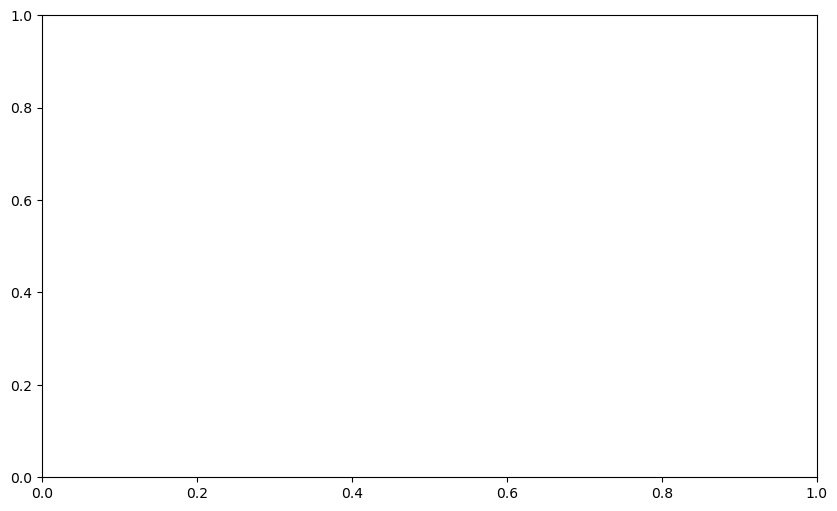

In [4]:
import matplotlib.pyplot as plt

# Plotting the time series of reference wind speeds
plt.figure(figsize=(10, 6))
plt.plot(combined_df['_time'], combined_df['V'], label='Reference Wind Speed', color='b')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.title('Time Series of Reference Wind Speeds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()